# Introductory applied machine learning
# Assignment 1: Data analysis and visualisation

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

# Question 1
## 20 Newsgroup Dataset 

### Description of the dataset

This question is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
# (1) # Your Code goes here:

In [3]:
# (1) # Student needs to provide code similar to below
# (2 Marks) - Load Dataset
data_path_raw = os.path.join(os.getcwd(), 'datasets', 'raw_20news.csv')
news_raw = pd.read_csv(data_path_raw, delimiter = ',')

# (2 Marks) - Info & describe DataSet
print(news_raw.info())
print(news_raw.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB
None
            w1_aaa      w2_pins       w3_kmr    w4_notion    w5_queens  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean      5.128229     6.097698     6.120244     5.551902     5.521841   
std      38.292577    46.190953    46.656022    40.953913    40.978098   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max     572.000000   583.000000   579.000000   580.000000   591.000000   

         w6_dwyer  w7_defenseman       w8_gld   w9_tocchet     w10_home  ...  \
count  2129.00000    2129.000000  2129.000000  2129.000000  2129.000000  ...   
mean      6.1277

(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

(3 Marks) - Basic Discussion. Students should realise that:
1. There are 2129 Data instances, each with 520 attributes (features). 
1. Each attribute is an integer count

(3 Marks) - Bonus: Students may mention 1 of the following to get extra marks
1. Most values are very close to 1. This is shown from both the low mean, as well as the percentiles. This shows sparsity.
1. Almost all attributes have some extreme values. This should indicate to them that there are outliers.



### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [4]:
# (1) # Your Code goes here:

In [5]:
# (1) # Student needs to provide code similar to below
# (2 Marks) - They can display any ones... this is just to get them to see the data.
news_raw.columns[:10]


Index(['w1_aaa', 'w2_pins', 'w3_kmr', 'w4_notion', 'w5_queens', 'w6_dwyer',
       'w7_defenseman', 'w8_gld', 'w9_tocchet', 'w10_home'],
      dtype='object')

(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

1. (2 Mark) - Features are named `w[n]_[word]`, where n is an index, and word is the word in question.
1. (2 Mark) - Bonus Mark: they should notice that some of the words appear to not even be proper english words (aaa, gld), and yet they appear to be highly informative of our classes!



# Question 2
## Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.21/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [6]:
# Your Code goes here:

In [7]:
# Student needs to provide code similar to below
# A - Load Data: (2 Marks)
data_path_clean = os.path.join(os.getcwd(), 'datasets')
news_train = pd.read_csv(os.path.join(data_path_clean, 'train_20news.csv'), delimiter = ',')
news_test = pd.read_csv(os.path.join(data_path_clean, 'test_20news.csv'), delimiter=',')
# B - Confirm that they are same dimensionality in features (2 Marks)
print(news_train.info())
print(news_test.info())
# C - Bonus Marks: Analyse the range of data, to see if both are cleaned... (which they are) (2 Marks)
print(news_train.describe())
print(news_test.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.3 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1910 to 2037
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 522.0 KB
None
            w1_aaa      w2_pins       w3_kmr    w4_notion    w5_queens  \
count  2099.000000  2099.000000  2099.000000  2099.000000  2099.000000   
mean      1.025727     1.017627     1.014769     1.008576     1.006193   
std       0.280109     0.205208     0.172657     0.115206     0.078473   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       8.000000     7.000000     5.000000     4.000000     2.000000   

          w6_dw

### ========== Question 2.2 --- [4 marks] ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

(1/2) ***Your answer goes here:***

(1/2) ***Student needs to answer similar to below:***

1. (2 Marks) The Naive Bayes assumes that the input features (attributes) are conditionally independent given the label.
1. (2 Marks) If we didn't make the Naive Bayes assumption we would have to estimate the full joint distribution between all variables! (which is exponential in the number of variables). At their level, it is equally justifiable in saying that we would need to estimate the full covariance matrix only (rather than individual probabilities).



### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

In [8]:
# (1) # Your Code goes here:

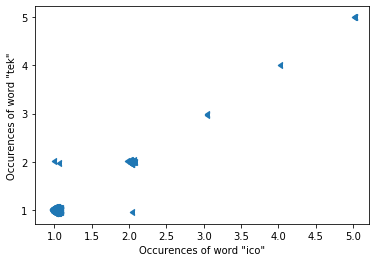

In [9]:
# (1) # Student needs to provide code similar to below
# (3 Marks)
scatter_jitter(news_train["w281_ico"], news_train["w273_tek"], jitter=0.1)
plt.xlabel('Occurences of word "ico"')
plt.ylabel('Occurences of word "tek"')
plt.show()


(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

1. (2 Mark) We observe that these two attributes are correlated.
1. (3 Marks) No, the above plot does not tell us much about whether the Naive Bayes Assumption applies to this problem or not. The reason is that the NB assumption talks of conditional independence, and without viewing the classes, it is impossible to judge this.



### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

(1) ***Your answer goes here:***

(1) ***Student needs to answer similar to below:***

(2 Marks) - A reasonable baseline against which to compare performance is a classifier that classifies everything as the class with the highest prior probability, i.e. the class that occurs most frequently in the  data. **Note** that if the student mentions the sklearn `dummy` classifier without explaining what it does, then this is insufficient (0 Marks).



In [10]:
# (2) # Your Code goes here:

In [11]:
from sklearn.metrics import accuracy_score
# (2) # Student needs to provide code similar to below
# Split the Data (2 Marks)
X_tr = news_train.drop('class', axis=1)
y_tr = news_train['class']

# Find most dominant and predict on it (3 Marks)
dominant_class = y_tr.value_counts().idxmax()
print('Class with highest prior probability: {}'.format(dominant_class))
print('Baseline performance: {:.3f}'.format(accuracy_score(y_tr, np.full_like(y_tr, dominant_class))))


Class with highest prior probability: 4
Baseline performance: 0.213


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?

*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [12]:
# (1) # Your Code goes here:

In [13]:
# (1) # Student needs to provide code similar to below
# (3 Marks) Train Model [Make sure that the students actually fit to the training dataset, not the test dataset]
gnb = GaussianNB().fit(X=X_tr, y=y_tr)
gnb_acc = gnb.score(X=X_tr, y=y_tr)


In [14]:
# (2) # Your Code goes here:

Classification accuracy on the training set: 0.878
rec.sport.baseball: 447
rec.sport.hockey: 446
comp.sys.mac.hardware: 422
comp.sys.ibm.pc.hardware: 421
alt.atheism: 363


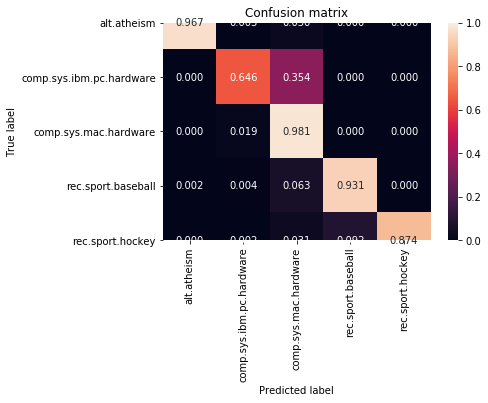

In [15]:
# (2) # Student needs to provide code similar to below
# (1 Mark) Report Accuracy
print('Classification accuracy on the training set: {:.3f}'.format(gnb_acc))

# (3 Marks) Plot Confusion Matrix - Need to realise that best is to plot Normalised, 
classes = ["alt.atheism", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware", "rec.sport.baseball", "rec.sport.hockey"]    
cm = confusion_matrix(y_tr, gnb.predict(X=X_tr))
plot_confusion_matrix(cm, classes=classes, norm=True)

# (1 Marks) Print out Class Densities (true) to allow for answering accuracy's merit
for idx, cnt in y_tr.value_counts().iteritems():
    print('{}: {}'.format(classes[idx-1], cnt))


(3) ***Your answer goes here:***

(3) ***Student needs to answer similar to below:***

1. (1 Mark) They should compare to the Baseline: seems considerably better
1. (2 Marks) They should realise that the classes are quite balanced (apart from alt.atheism) so maybe it is reasonable. If they say that it is not due to alt.atheism not being same as the others, it is also ok.
1. (1 Mark) Bonus mark if they mention that it also depends on the task: if one of the classes is more important for us, we may want to penalise errors in it more strongly.



### ========== Question 2.6 --- [3 marks] ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

***Your answer goes here:***

***Student needs to answer similar to below:***

Points for:
* Understanding what the best and worst predicted classes are
* Interpreting the data i.e. understanding that the classes that are confused are related

Example full mark answer:
  
The most common misclassification in the training set is to mistake `comp.sys.ibm.pc.hardware` for `comp.sys.mac.hardware` classes. This is somewhat expected as these two classes are related. However, interestingly `comp.sys.mac.hardware` is rarely mistaken for `comp.sys.ibm.pc.hardware`. This implies we are over predicting mac and underpredicting ibm. Similarly `rec.sport.hockey` is sometimes mistaken for `rec.sport.baseball`, but rarely vice versa.



### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

In [16]:
# (1) # Your Code goes here:

Naive Bayes Evaluation Accuracy: 0.820


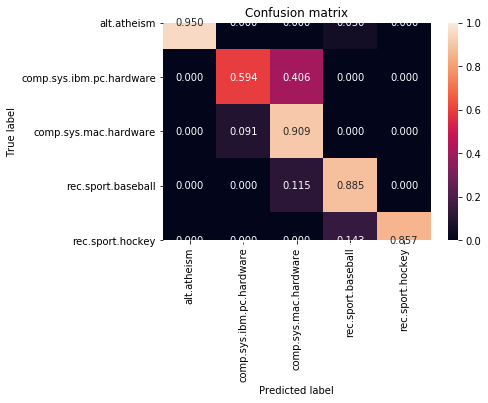

In [17]:
# (1) # Student needs to provide code similar to below
# (a) - Prepare Data [1 Marks]
X_ts = news_test.drop('class', axis=1)
y_ts = news_test['class']

# (b) - Evaluate NB Classifier and Display [3 Marks]
print('Naive Bayes Evaluation Accuracy: {:.3f}'.format(gnb.score(X=X_ts, y=y_ts)))
plot_confusion_matrix(confusion_matrix(y_ts, gnb.predict(X=X_ts)), classes=classes, norm=True)


In [18]:
# (2) # Your Code goes here:

In [19]:
# (2) # Student needs to provide code similar to below
# (a) - Evaluate Baseline and Printout [2 Marks]
print('Baseline Evaluation Accuracy: {:.3f}'.format(accuracy_score(y_ts, np.full_like(y_ts, dominant_class))))


Baseline Evaluation Accuracy: 0.203


(3) ***Your answer goes here:***

(3) ***Student needs to answer similar to below:***

The students should mention the following:
1. [1 Mark] The NB does significantly better than the baseline.
1. [2 Marks] The performance on the test data set is good, especially given the assumptions of the model. The most difficult class to predict is `comp.sys.ibm.pc.hardware` and the easiest class to predict correctly (true positive rate) is `alt.atheism`.
1. [3 Marks] Performance on the testing data is comparable with the training data. This shows that (mentioning 1 gets 2 marks):
  1. Training/Testing split seems to be reasonably balanced.
  1. There is no evidence of overfitting (otherwise testing performance would have dropped significantly)




### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [20]:
# (1) # Your Code goes here:

In [21]:
# (1) # Student needs to provide code similar to below
# [1 Marks] - Re-Extract Data
X_tr_raw = news_raw.drop('class', axis=1)
y_tr_raw = news_raw['class']

# [3 Marks] - Re-Train Model on Raw but test on test set
gnb_outliers = GaussianNB().fit(X=X_tr_raw, y=y_tr_raw)
gnb_outliers_acc = gnb_outliers.score(X=X_ts, y=y_ts)

# (1 Mark) - Report Accuracy
print('Classification accuracy on the testing set: {:.3f}'.format(gnb_outliers_acc))


Classification accuracy on the testing set: 0.172


(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

(2 Marks) - Obviously the outliers have a significant impact on the results. As expected, Naive Bayes suffers badly as it is fitting Gaussians to the data, which will be heavily influenced by the outliers (shifting mean/mass). Indeed, it has worse performance than the baseline!



### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***

***Student needs to answer similar to below:***

1. [2 Marks] The Gaussian Naive Bayes is suited to continuous data, whereas in this case, we have count data.
1. [1 Mark] Idealy, we would use a Multinomial Naive Bayes Model, which is directly applicable to integer counts.



<a id='question_3'></a>
# Question 3
## Automobile Pricing Dataset

### Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_3_1'></a>
### ========== Question 3.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [22]:
# (1) # Your Code goes here:

In [23]:
# (1) # Student needs to provide code similar to below
# (2 Marks) - Load the DataSet correctly
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

# (2 Marks) - Some description printing
display(auto_numeric.info())
display(auto_numeric.head(8))
display(auto_numeric.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB


None

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

Students should mention:
 1. [2 marks] Dataset has 159 Data points, with 15 attributes (price is the target variable)
 1. [1 mark] All attributes/features are real-valued, and seem to be correctly so (in the sense that it is the correct data-type for the value)
 1. [1 mark] Data seems to be clean, with no extreme jumps in the quantiles (this is a confirmation of our description)



### ========== Question 3.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

In [24]:
# (1) # Your Code goes here:

highway-mpg               -0.438467
city-mpg                  -0.356790
mean-effective-pressure   -0.104860
peak-rpm                  -0.099345
normalized-losses          0.015368
torque                     0.101435
compression-ratio          0.125683
stroke                     0.127834
height                     0.139563
bore                       0.365207
wheel-base                 0.423511
engine-power               0.443969
length                     0.512883
width                      0.524326
engine-size                0.715125
dtype: float64

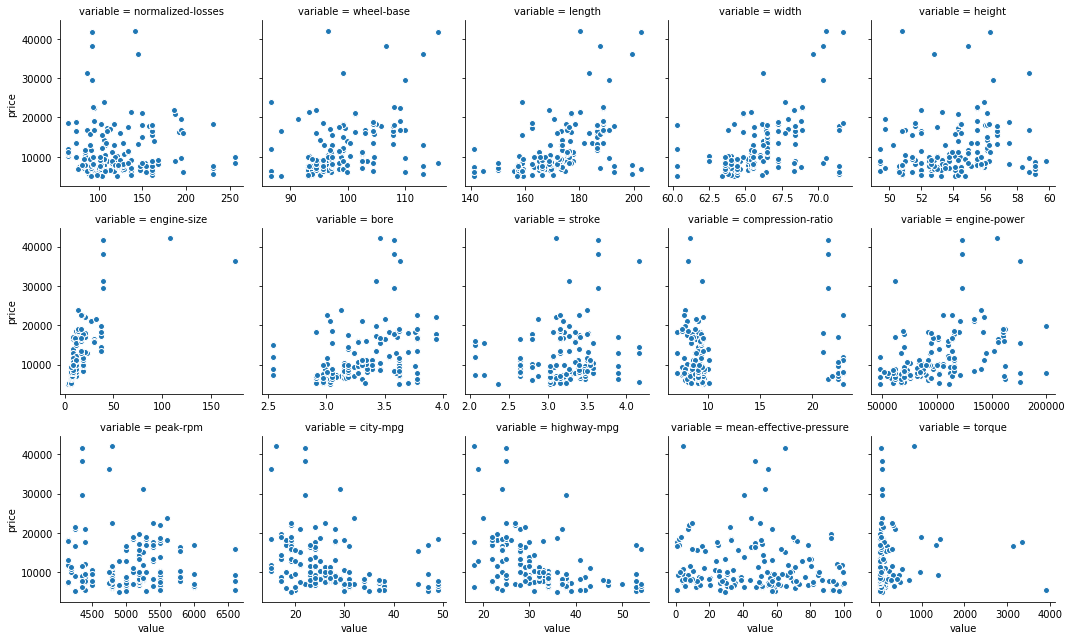

In [25]:
# (1) # Student needs to provide code similar to below
# A - [3 Marks] - Student should compute correlation coefficients between each attribute and price.
#    - 1 Marks for computing correlation coefficient correctly
#    - 1 Mark for displaying
#    - 1 Mark for showing names and sorting
corr_coeffs = np.corrcoef(auto_numeric, rowvar=False)[:-1,-1]
corr_coeffs = pd.Series(corr_coeffs, index=auto_numeric.columns[:-1])
display(corr_coeffs.sort_values())

# B - [4 Marks] - Plotting Scatter Plots
#      - 3 Marks for hitting on the need for Scatter Plots and implementing it
#      - 1 Mark for appropriate labelling/presentation
# Students can equally well use seaborn pairplot:
#   sns.pairplot(data=auto_numeric, x_vars=auto_numeric.drop("price", axis=1).columns.tolist(), y_vars = "price")
g = sns.FacetGrid(pd.melt(auto_numeric, id_vars='price'), col="variable", col_wrap=5, sharex=False)
g = g.map(plt.scatter, "value", "price", edgecolor='w')


(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

[2 Marks] Attributes which might be useful in predicting the price should be those where the **absolute** correlation coefficient is highest. Students should mention at least 5 from:
`engine-size`, `width`, `length`, `engine-power`, `wheel-base`, `highway-mpg`.

[1 Mark] Correlation Coefficient may be more useful since it is normalised. If they normalised the plots, then plots may be more indicative.

[Bonus +1 Mark] if the students mention that it does not matter if the correlation is negative... can still be significant. In other words if they pick `highway-mpg` over `wheel-base`.



In [26]:
# (3) # Your Code goes here:

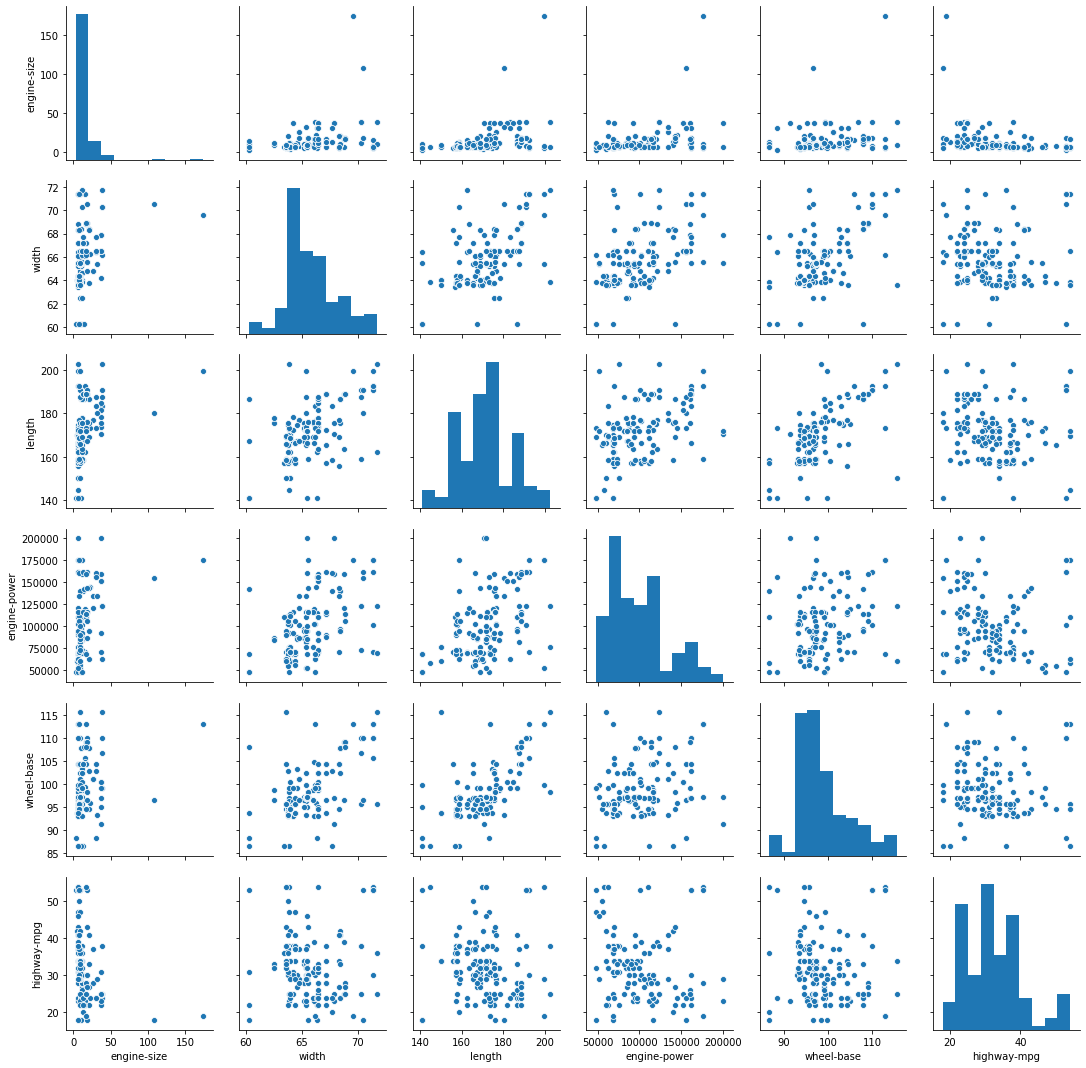

In [27]:
# (3) # Student needs to provide code similar to below
# [2 marks] Display pair-plots of the useful variables. It seems there is no need for normalisation. 
#   Note if the student displays pair-plots of `useless` variables, then do not deduct marks... 
#      since this is based on the previous question.
useful_vars = ['engine-size', 'width', 'length', 'engine-power', 'wheel-base', 'highway-mpg']
sns.pairplot(data=auto_numeric, vars=useful_vars)


(4) ***Your answer goes here:***

(4) ***Student needs to answer similar to below:***

[2 Marks] Identify at least 2 pairs which appear correlated. Ideally from:
  * `length` and `wheel base`
  * `width` and `wheel-base`
  * `engine-power` and `length`
  


(5) ***Your answer goes here:***

(5) ***Student needs to answer similar to below:***

[4 Marks] Students should realise that attributes can be removed if:
  * They are 'useless' in predicting the price: hence those say with less than 0.1 corrcoeff (or close to 0.1)
  * They are pairwise correlated with other variables and hence give limited extra information on price.
   
For full marks, the student should describe each of the above motivations and give at least 1 example of each.



# Question 4
## Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.21/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. In this question we will perform K-fold cross-validation using scikit's *KFold* class.**

<a id='question_4_1'></a>
### ========== Question 4.1 --- [5 marks] ==========

K-fold cross-validation.

1. [Text] What other technique for validation could we use (rather than K-Fold cross-validation)?

1. [Text] Given the analysis you did on the automobile dataset in [Question 3](#question_3), what problem are we trying to solve by using K-Fold cross-validation?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*


(1) ***Your answer goes here:***

(1) ***Student needs to answer similar to below:***

[1 Mark] We can use a hold-out validation set.

(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

[2 Marks] Since we have limited data (159 samples), the testing set is very small (~30 samples). This means that:
  1. Statistics may not be accurate (since sample size is too small)
  1. Test-set may be biased by the selection procedure (might not contain a representative sample)


In [28]:
# (3) # Your Code goes here:

In [29]:
# (2) # Student needs to provide code similar to below
# [2 Marks] Create K-Fold Instance
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# [Brownie Points] Visualise Folds
for ii, (train_idx, valid_idx) in enumerate(cv.split(auto_numeric)):
    print('Fold {}:\nTrain ids: {}\nValid ids: {}\n'
          '\n----------------------------------------\n'.format(ii, train_idx, valid_idx))

Fold 0:
Train ids: [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158]
Valid ids: [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]

----------------------------------------

Fold 1:
Train ids: [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76 

### ========== Question 4.1 --- [4 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 3.1](#question_3_1), and evaluate it using the *KFold* instance you created in [Question 4.1](#question_4_1) (report RMSE and $R^2$). 

In [30]:
# (1) # Your Code goes here:

In [31]:
# (1) # Student needs to provide code similar to below
# [3 Marks] Train Model: deduct 2 Marks if they forget to drop price variable!
X = auto_numeric.drop("price", axis=1).values
y = auto_numeric["price"].values
y_pred = cross_val_predict(estimator=LinearRegression(), X=X, y=y, cv=cv)

# [1 Mark] Report Performance
print('Scores - [R^2: {:.3f}] [RMSE: {:.3f}]'.format(r2_score(y,y_pred),
                                                     np.sqrt(mean_squared_error(y, y_pred))))


Scores - [R^2: 0.486] [RMSE: 4819.805]


### ========== Question 4.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

In [32]:
# (1) # Your Code goes here:

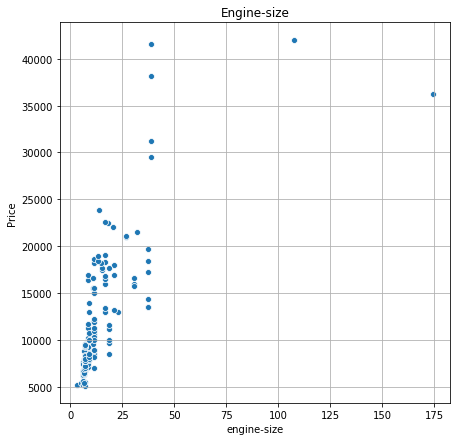

In [44]:
plt.figure(figsize=(7, 7))
# (1) # Student needs to provide code similar to below
# [2 Marks] - Plot scatter with labels
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')

# ys = np.log(auto_numeric['engine-size'])
# plt.plot(auto_numeric['engine-size'], ys)
plt.grid()
# plt.savefig('/home/tdinev/43engine.png')

(2) ***Your answer goes here:***

(2) ***Student needs to answer similar to below:***

(2 Marks) The `engine-size` attribute has a highly-skewed relation with the price, which will be hard to model with a linear relationship.



<a id='question_4_3'></a>
### ========== Question 4.3 --- [10 marks] ==========
#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

In [34]:
# (1) # Your Code goes here:

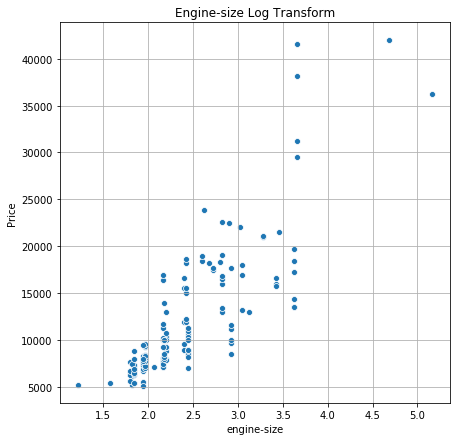

In [35]:
plt.figure(figsize=(7, 7))
# (1) # Student needs to provide code similar to below
# [2 Marks] - For Transforming using a correct transformation: log or square-root for example...
auto_numeric_trans = auto_numeric.copy(deep=True)   # Do not modify original just in case...
auto_numeric_trans["engine-size"] = np.log(auto_numeric["engine-size"])
ax = sns.scatterplot(auto_numeric_trans['engine-size'], auto_numeric_trans['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size Log Transform')

plt.grid()
plt.savefig('/home/tdinev/43engine_transformed.png')

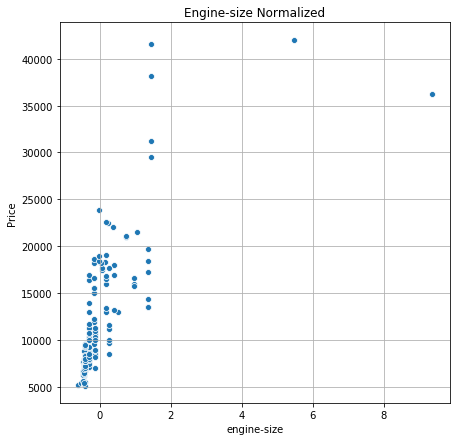

In [36]:
plt.figure(figsize=(7, 7))
auto_numeric_norm = auto_numeric.copy(deep=True)   # Do not modify original just in case...
auto_numeric_norm["engine-size"] = (auto_numeric["engine-size"] - np.mean(auto_numeric['engine-size'])) \
    / np.std(auto_numeric['engine-size'])
ax = sns.scatterplot(auto_numeric_norm['engine-size'], auto_numeric_trans['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size Normalized')

plt.grid()

In [37]:
# (2) # Your Code goes here:

In [38]:
# (2) # Student needs to provide code similar to below
# [2 Marks] - Extract Data and Train
X = auto_numeric_trans.drop("price", axis=1).values
y = auto_numeric_trans["price"].values
y_pred = cross_val_predict(estimator=LinearRegression(), X=X, y=y, cv=cv)

# [1 Mark] - Report Results
print('Scores - [R^2: {:.3f}] [RMSE: {:.3f}]'.format(r2_score(y,y_pred),
                                                     np.sqrt(mean_squared_error(y, y_pred))))
# For square-root, the values are 0.677, 3823.872


Scores - [R^2: 0.690] [RMSE: 3745.920]


(3) ***Your answer goes here:***

(3) ***Student needs to answer similar to below:***

1. [1 Mark] The performance has improved after applying the logarithm (or square root) transformation. 
1. [4 Marks] Students should realise two things:
   1. Comparing the scatter before and after the transformation, we see that there is now more of a linear relationship. The transformation has weakened the distorting effect of the more extreme values in our dataset on the regression line, and widened the original compact parts at the lower-end of the scale.
   1. The `engine-size` attribute was a very important attribute to begin with (it had the highest corr-coeff of all single attributes).



### ========== Question 4.4 --- (LEVEL 11) --- [12 marks] ==========

#### <span style="color:blue">SUBMIT ANSWERS TO THIS QUESTION</span>

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 4.3](#question_4_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

(1) ***Student needs to answer similar to below:***

1. [2 Marks] - The magnitude of the coefficient indicates how much a unit-change in the independent variable effects the target variable. Hence it depends on the magnitude of the independent (and also the dependent) variable to begin with. Hence, if two attributes are not on the same scale, we cannot compare them.

1. [2 Mark] - The students can choose to either:
    * Standardise them to cover the same range (i.e. Min/Max Values). This is my personal preference as it ensures that the range is actually the same for all.
    * Normalise them to the same mean/variance. This is probably a more standard approach.



In [39]:
# (2) # Your Code goes here:

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
# (2) # Student needs to provide code similar to below
# [2 Marks] - Perform the Transformation using Scikit learn
#   Alternatively student may do the transform themselves:
#       X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#   Note that it is ok if the students also transform y but this is not necessary!
X_std = MinMaxScaler().fit_transform(X)

# [1 Mark] - Retrain classifier on data
params = LinearRegression().fit(X_std, y).coef_

# [3 Marks] - Display the Coefficients, sorted in some order. Students should also label them appropriately.
params = pd.DataFrame({'Coeff': params}, index=auto_numeric_trans.drop("price", axis=1).columns).sort_values(['Coeff'])
display(params)


,Coeff
highway-mpg,-6140.124080
stroke,-4234.907842
engine-power,-2425.451008
bore,-2053.237206
mean-effective-pressure,-1856.124863
normalized-losses,-1445.771023
torque,-792.856357
length,-191.955839
height,1771.382909
wheel-base,2022.070829


(3) ***Your answer goes here:***

(3) ***Student needs to answer similar to below:***

[2 Marks] Students should indicate that the most important are `engine-size`, `width` and `highway-mpg`: i.e. they should realise that it is the magnitude (and not the sign) that governs this. 



### ========== Question 4.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 4.3](#question_4_3).

(1) ***Your answer goes here:***

(1) ***Student needs to answer similar to below:***

1. [1 Mark] - Look at the target-vs-feature plots of Question 1.2 and find those which appear to be highly non-linear.
1. [1 Mark] - Hyper-Parameter optimisation (multiple cross-validation runs).



In [42]:
# (2) # Your Code goes here:

In [43]:
# (2) # Student needs to provide code similar to below
# [1 Mark] - Extract Data
auto_nl = pd.read_csv(os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv'), delimiter = ',')
X = auto_nl.drop('price', axis=1).values
y = auto_nl['price'].values

# [3 Marks] - Squaring but retaining the original features
X = np.append(X, np.square(auto_numeric['length'])[:, np.newaxis], axis=1)
X = np.append(X, np.square(auto_numeric['engine-power'])[:, np.newaxis], axis=1)
# [1 Mark] - Add the cross-product as the true second-order
X = np.append(X, np.multiply(auto_numeric['length'], auto_numeric['engine-power'])[:, np.newaxis], axis=1)

# [1 Mark] - Train a new model and report results
y_pred = cross_val_predict(estimator=LinearRegression(), X=X, y=y, cv=cv)
print('Scores - [R^2: {:.3f}] [RMSE: {:.3f}]'.format(r2_score(y,y_pred),
                                                     np.sqrt(mean_squared_error(y, y_pred))))


Scores - [R^2: 0.664] [RMSE: 3897.700]


(3) ***Your answer goes here:***

(3) ***Student needs to answer similar to below:***

1. [1 Mark] - Performance is comparable, if arguably worse.
1. [1 Mark] - This could be a case of overfitting to the training data, especialy since we have limited training examples.

